In [ ]:
ver datos

In [62]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Cargar los datos
dat_csv = pd.read_csv('Clima-rg-Mes.csv', encoding="ISO-8859-1", delimiter=";")

# Eliminar espacios adicionales en los nombres de las columnas
dat_csv.columns = dat_csv.columns.str.strip()

# Reemplazar diferentes formatos de valores faltantes por NaN
dat_csv.replace(['-', '', ' '], np.nan, inplace=True)

# Convertir 'Lluvia Caida' a formato numérico (reemplazar comas por puntos)
dat_csv['Lluvia Caida'] = dat_csv['Lluvia Caida'].str.replace(',', '.').astype(float)

# Crear un diccionario de mapeo para los meses
meses_map = {
    'enero': 1, 'febrero': 2, 'marzo': 3, 'abril': 4, 'mayo': 5, 'junio': 6,
    'julio': 7, 'agosto': 8, 'septiembre': 9, 'octubre': 10, 'noviembre': 11, 'diciembre': 12
}

# Reemplazar los nombres de los meses por sus respectivos números
dat_csv['mes'] = dat_csv['mes'].map(meses_map)

# Verificar cuántos valores faltantes hay ahora en las columnas clave
print(f"Valores faltantes en 'Lluvia Caida': {dat_csv['Lluvia Caida'].isnull().sum()}")
print(f"Valores faltantes en 'mes': {dat_csv['mes'].isnull().sum()}")

# Eliminar filas con valores NaN en columnas relevantes
dat_csv.dropna(subset=['Lluvia Caida', 'mes'], inplace=True)

# Verificar el tamaño de los datos después de la limpieza
print(f"Datos después de eliminar filas con NaN: {dat_csv.shape}")

# Asegurarse de que el DataFrame no esté vacío
if dat_csv.shape[0] == 0:
    print("El conjunto de datos está vacío después de eliminar filas con valores faltantes.")
else:
    # Seleccionar las variables para la regresión
    X = dat_csv[['mes']]  # Característica: mes
    y = dat_csv['Lluvia Caida']  # Variable objetivo: Lluvia Caida

    # Dividir el dataset en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Crear y entrenar el modelo de regresión lineal
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Realizar predicciones
    y_pred = model.predict(X_test)

    # Evaluar el modelo usando el error cuadrático medio (MSE)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Error cuadrático medio (MSE): {mse}")

    # Ver los coeficientes del modelo
    print(f"Coeficiente de regresión: {model.coef_}")
    print(f"Intercepto: {model.intercept_}")


Valores faltantes en 'Lluvia Caida': 0
Valores faltantes en 'mes': 0
Datos después de eliminar filas con NaN: (168, 7)
Error cuadrático medio (MSE): 416.44773417708114
Coeficiente de regresión: [-0.95789833]
Intercepto: 32.8037552736741


In [63]:
print(dat_csv['mes'].unique())


[ 1  2  3  4  5  6  7  8  9 10 11 12]


In [64]:
# Verificar los valores nulos en la columna 'mes'
nulos_mes = dat_csv['mes'].isnull().sum()
print(f"Valores nulos en 'mes': {nulos_mes}")


Valores nulos en 'mes': 0


In [65]:


# Verificar cuántos valores faltantes hay ahora en las columnas clave
print(f"Valores faltantes en 'Lluvia Caida': {dat_csv['Lluvia Caida'].isnull().sum()}")
print(f"Valores faltantes en 'mes': {dat_csv['mes'].isnull().sum()}")

# Eliminar filas con valores NaN en columnas relevantes
dat_csv.dropna(subset=['Lluvia Caida', 'mes'], inplace=True)

# Verificar el tamaño de los datos después de la limpieza
print(f"Datos después de eliminar filas con NaN: {dat_csv.shape}")

# Asegurarse de que el DataFrame no esté vacío
if dat_csv.shape[0] == 0:
    print("El conjunto de datos está vacío después de eliminar filas con valores faltantes.")
else:
    # Seleccionar las variables para la regresión
    X = dat_csv[['mes']]  # Característica: mes
    y = dat_csv['Lluvia Caida']  # Variable objetivo: Lluvia Caida

    # Dividir el dataset en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Crear y entrenar el modelo de regresión lineal
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Realizar predicciones
    y_pred = model.predict(X_test)

    # Evaluar el modelo usando el error cuadrático medio (MSE)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Error cuadrático medio (MSE): {mse}")

    # Ver los coeficientes del modelo
    print(f"Coeficiente de regresión: {model.coef_}")
    print(f"Intercepto: {model.intercept_}")


Valores faltantes en 'Lluvia Caida': 0
Valores faltantes en 'mes': 0
Datos después de eliminar filas con NaN: (168, 7)
Error cuadrático medio (MSE): 416.44773417708114
Coeficiente de regresión: [-0.95789833]
Intercepto: 32.8037552736741


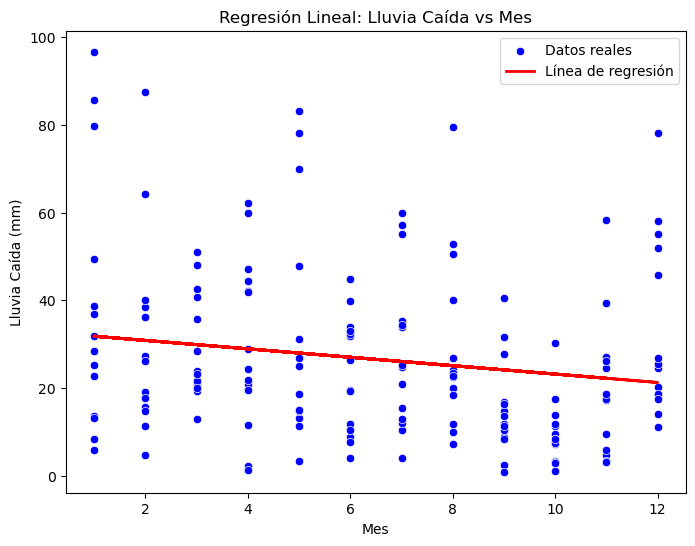

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Graficar los datos originales
plt.figure(figsize=(8, 6))
sns.scatterplot(x='mes', y='Lluvia Caida', data=dat_csv, color='blue', label='Datos reales')

# Graficar la línea de regresión
plt.plot(X_test, y_pred, color='red', label='Línea de regresión', linewidth=2)

# Añadir títulos y etiquetas
plt.title('Regresión Lineal: Lluvia Caída vs Mes')
plt.xlabel('Mes')
plt.ylabel('Lluvia Caída (mm)')
plt.legend()

# Mostrar el gráfico
plt.show()


In [67]:
# Nuevos valores de mes (por ejemplo, para los meses 1 (enero), 3 (marzo), etc.)
mes_nuevos = pd.DataFrame({'mes': [1, 3, 5, 7, 9, 12]}) 

# Usar el modelo para predecir la lluvia caída
predicciones = model.predict(mes_nuevos)

# Mostrar las predicciones
print("Predicciones para los nuevos meses:")
for mes, lluvia in zip(mes_nuevos['mes'], predicciones):
    print(f"Mes {mes}: {lluvia:.2f} mm")


Predicciones para los nuevos meses:
Mes 1: 31.85 mm
Mes 3: 29.93 mm
Mes 5: 28.01 mm
Mes 7: 26.10 mm
Mes 9: 24.18 mm
Mes 12: 21.31 mm
